# Проект "Увеличение выручки интернет-магазина"

# Цели и методы исследования

Крупный интернет-магазин хочет увеличить выручку от своей деятельности.

Для достижения цели заказчика (например, финансовой службы, директора или владельца) аналитический и маркетинговый отделы составили список гипотез.

Чтобы проверить гипотезы нам необходимо:
1. Приоритизировать их методами ICE и RICE;
2. Провести A/B-тест и зафиксировать результаты;
3. Проанализировать результаты A/B-теста:
- сравнить выручку в группах;
- сравнить средний чек в группах;
- сравнить количество заказов в группах.

A/B-тест - это самый дорогой метод проверки гипотез. Чтобы минимизировать погрешности и неправильные выводы, при его проведении мы будем исследовать кумулятивные данные, оценивать их на наличие выбросов, анализировать данные с выбросами и без них.

Чтобы выводы можно было представить заказчику в легкой для воспрития форме, мы построим графики изменений в наблюдаемых группах.

Результатом исследования будет принятие решения о победе одной из групп или об отсутствии различий между ними, а также вывод о жизнеспособности гипотезы.

# Часть 1. Приоритизация гипотез

### Обзор и предобработка данных

В нашем распоряжении находится датафрейм со списком гипотез для увеличения выручки. Рассмотрим его. Перед этим импортируем все библиотеки, которые понадобятся в ходе исследования.

In [ ]:
# импортируем библиотеки

# для работы с таблицами
import pandas as pd

# для математических функций
import numpy as np

# для работы с датой и временем
import datetime as dt

# для статистических тестов
from scipy import stats as stats

#  для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

Сохраним данные файла /datasets/hypothesis.csv в переменной data.

In [ ]:
data = pd.read_csv('/datasets/hypothesis.csv')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Переименуем столбцы в соответствии со змеиным регистром.

In [ ]:
data.columns = data.columns.str.lower()
data.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Всего составлено 9 гипотез. Чтобы выбрать, что тестировать, оценим и приоритизуем гипотезы методами ICE и RICE.

### Оценка гипотез методом ICE

Метод ICE оценивает 3 параметра гипотезы: влияние на пользователей (impact), уверенность в жизнеспособности гипотезы (confidence), стоимость проверки гипотезы (efforts). Рассчитаем комплексную оценку гипотез этим методом.

In [ ]:
# добавим столбец ICE к датафрейму data
data['ICE'] = round((data['impact'] * data['confidence']) / data['efforts'], 2)

# выведем список гипотез и оценку ICE
data_sorted = data[['hypothesis', 'ICE']].sort_values('ICE', ascending=False).reset_index(drop=True)
pd.options.display.max_colwidth = 210
data_sorted

,hypothesis,ICE
0,"Запустить акцию, дающую скидку на товар в день рождения",16.20
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Отобразим итоговый рейтинг в виде барчарта.

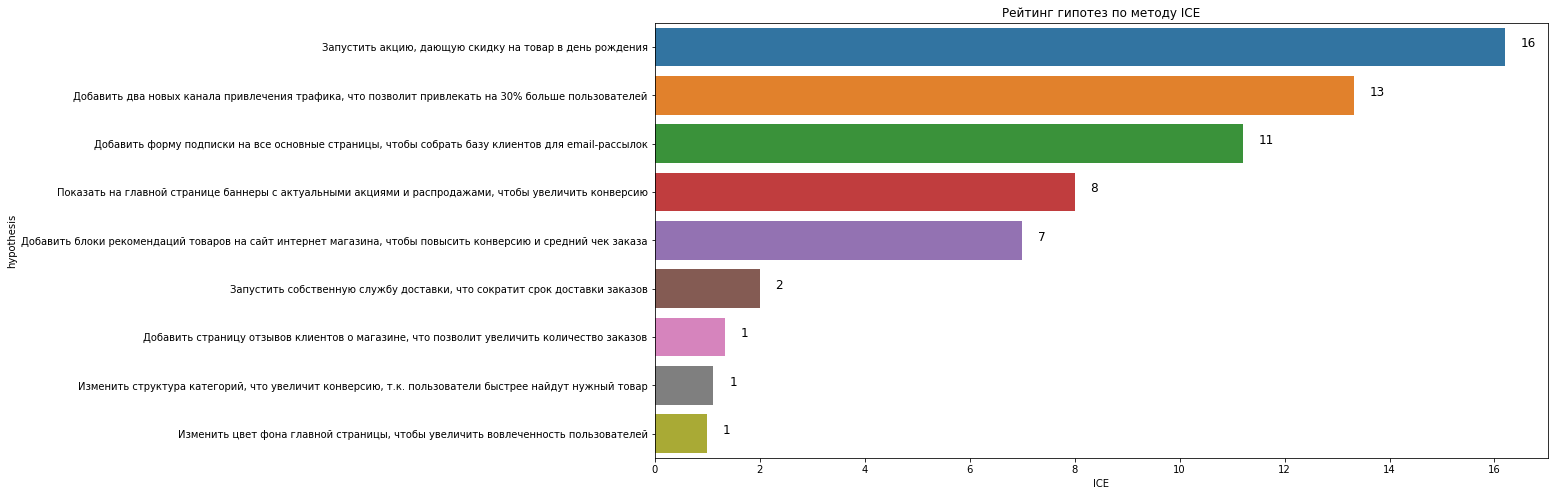

In [ ]:
f, ax = plt.subplots(figsize=(16, 8))
ax = sns.barplot(x='ICE', y='hypothesis', data = data_sorted)

# добавим подписи к столбцам графика
[ax.text(p.get_width()+0.3, p.get_y() + p.get_height()/2,
         int(p.get_width()), fontsize=12)
 for p in ax.patches]
plt.title('Рейтинг гипотез по методу ICE')
plt.show()

In [ ]:
print(f'По методу ICE необходимо тестировать гипотезу:\n{data_sorted.loc[0, "hypothesis"]}')

По методу ICE необходимо тестировать гипотезу:
Запустить акцию, дающую скидку на товар в день рождения


### Оценка гипотез методом RICE

В отличие от метода ICE метод RICE в список показателей оценки качества гипотезы добавляется охват (reach) - количество пользователей, которых затронет изменение. Оценим наши гипотезы этим методом.

In [ ]:
# добавим столбец ICE к датафрейму data
data['RICE'] = round((data['reach'] * data['impact'] * data['confidence']) / data['efforts'], 2)

# выведем список гипотез и оценку ICE
data_sorted = data[['hypothesis', 'RICE']].sort_values('RICE', ascending=False).reset_index(drop=True)
pd.options.display.max_colwidth = 210
data_sorted

,hypothesis,RICE
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
4,"Запустить акцию, дающую скидку на товар в день рождения",16.2
5,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Как и в случае с методом ICE, отобразим итоговый рейтинг в виде столбчатой диаграммы.

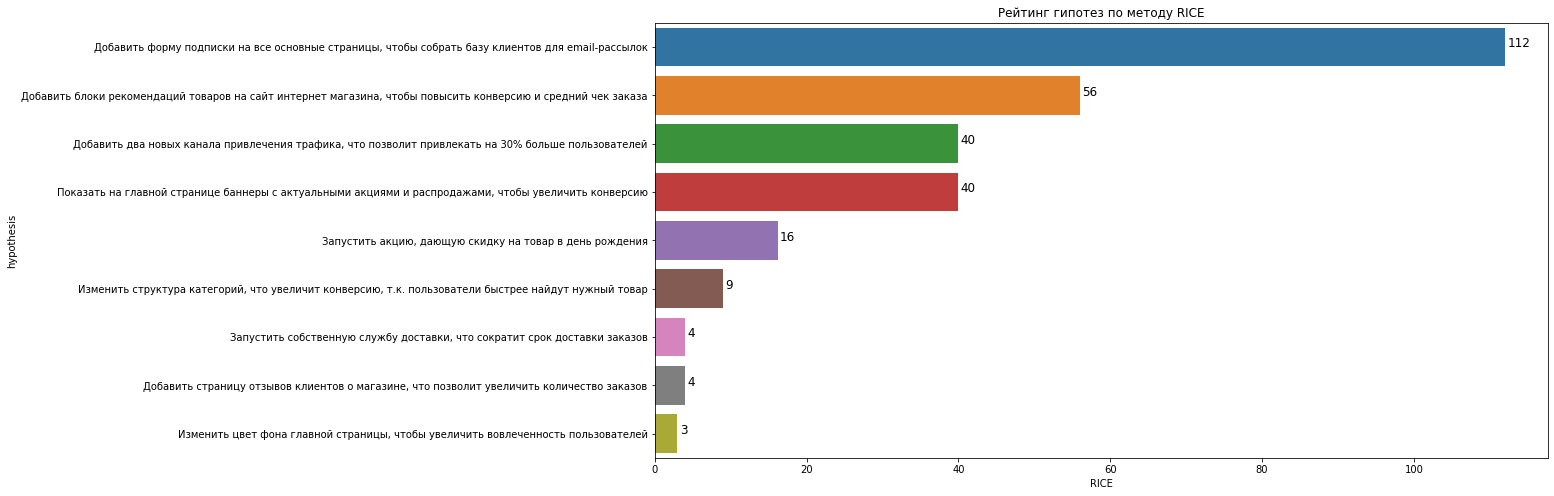

In [ ]:
f, ax = plt.subplots(figsize=(16, 8))
ax = sns.barplot(x='RICE', y='hypothesis', data = data_sorted)

# добавим подписи к столбцам графика
[ax.text(p.get_width()+0.3, p.get_y() + p.get_height()/2,
         int(p.get_width()), fontsize=12)
 for p in ax.patches]
plt.title('Рейтинг гипотез по методу RICE')
plt.show()

In [ ]:
print(f'По методу RICE необходимо тестировать гипотезу:\n{data_sorted.loc[0, "hypothesis"]}')

По методу RICE необходимо тестировать гипотезу:
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок


В результате оценки гипотез методами ICE и RICE мы получили два разных результата: по методу ICE надо тестировать акцию в честь дня рождения, по методу RICE - форму подписки на рассылку. Если еще раз взглянуть на первоначальную таблицу с гипотезами, обе гипотезы не сильно отличаются по показателям impact, confidence и efforts. Но охват пользователей у гипотезы с подпиской максимальный - 10 баллов, а у гипотезы с акцией - всего 1 балл, что логично: предложение подписаться на рассылку коснется почти всех посетителей сайта, а предложение с акцией - только тех, кто посетит интернет-магазин в свой день рождения. Если бы e-mail рассылка уже была внедрена, то можно было рассылать предложение с акцией ко дню рождения на электронные почты посетителей, и тогда показатель охвата для этой гипотезы был бы выше. Так как e-mail-рассылки и скидки ко дню рождения внедрены во многих интернет-магазинах, закономерным будет тестировать гипотезу с акцией ко дню рождения одной из следующих. А в настоящее время необходимо тестировать гипотезу с формой подписки на e-mail рассылку.

# Часть 2. Анализ результатов A/B-теста

Мы провели A/B-тест и получили результаты, которые собраны в файлах '/datasets/orders.csv' и '/datasets/visitors.csv'. Откроем их, проверим на пропуски и аномалии и рассмотрим данные.

### Проверка данных на пропуски

In [ ]:
# сохраним данные в датафреймы orders и visitors
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

display(orders.head(10))
visitors.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [ ]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В обоих датасетах пропусков нет.

Теперь посмотрим, за какой период собраны данные. Для этого сначала изменим формат столбцов с датой.

In [ ]:
orders['date'] = pd.to_datetime(orders['date'])
orders['date'].dtype

dtype('<M8[ns]')

In [ ]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors['date'].dtype

dtype('<M8[ns]')

In [ ]:
print(f'Данные о заказах собраны за период с {orders["date"].dt.date.min()} по {orders["date"].dt.date.max()}.')

Данные о заказах собраны за период с 2019-08-01 по 2019-08-31.


In [ ]:
print(f'Данные о посетителях собраны за период с {visitors["date"].dt.date.min()} по {visitors["date"].dt.date.max()}.')

Данные о посетителях собраны за период с 2019-08-01 по 2019-08-31.


Периоды в обеих таблицах аналогичны.

#### Обзор размеров заказов

Посмотрим основные статистические метрики датафрейма 'orders'.

In [ ]:
orders.describe().apply(lambda s: s.apply(lambda x: format(x, '.3f')))

,transactionId,visitorId,revenue
count,1197.000,1197.000,1197.000
mean,2155621385.530,2165960143.099,8348.006
std,1229084904.760,1236014192.147,39191.132
min,1062393.000,5114589.000,50.000
25%,1166775572.000,1111826046.000,1220.000
50%,2145193898.000,2217984702.000,2978.000
75%,3237740112.000,3177606451.000,8290.000
max,4293855558.000,4283872382.000,1294500.000


Построим диаграмму типа boxplot, чтобы визуально оценить размер выручки по транзакциям. Сделаем это в разбивке по группам.

<AxesSubplot:xlabel='revenue', ylabel='group'>

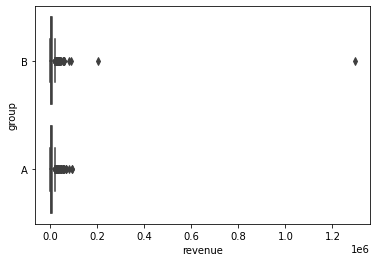

In [ ]:
sns.boxplot(data=orders, x='revenue', y='group')

Из-за выбросов в сумме заказа боксплот выглядит как линия. Построим график еще раз, но без самых больших выбросов, которые на первом графике соответствуют сумме заказа больше 20 тыс. руб.

<AxesSubplot:xlabel='revenue', ylabel='group'>

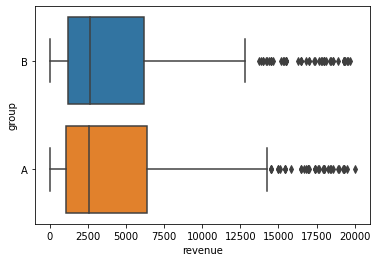

In [ ]:
sns.boxplot(data=orders.query('revenue < 20000'), x='revenue', y='group')

На графике без самых больших выбросов видно, что медианное значение суммы заказов находится на уровне чуть выше 2.5 тыс. руб. для обеих групп, при этом 4-ый квартиль находится в интервале 6 - 13 тыс. руб. для группы A и в интервале 6 - 12.5 тыс. руб. для группы B. Заказы больше 13 тыс. руб. в группе А и больше 12.5 в группе B встречаются редко. Выбросы могут искажать результаты A/B-теста, поэтому анализировать мы будем "сырые" и "очищенные" данные.

Построим гистограмму, отражающую количество заказов у каждого пользователя.

In [ ]:
orders_grouped = (orders
                  .groupby(['visitorId'], as_index=False)
                  .agg({'transactionId' : 'nunique', 'revenue' : 'sum'}))
orders_grouped

,visitorId,transactionId,revenue
0,5114589,1,570
1,6958315,1,1490
2,8300375,2,12300
3,11685486,1,6201
4,39475350,1,3990
...,...,...,...
1026,4266935830,2,157980
1027,4278982564,1,24744
1028,4279090005,1,6716
1029,4281247801,1,2640


<AxesSubplot:ylabel='Frequency'>

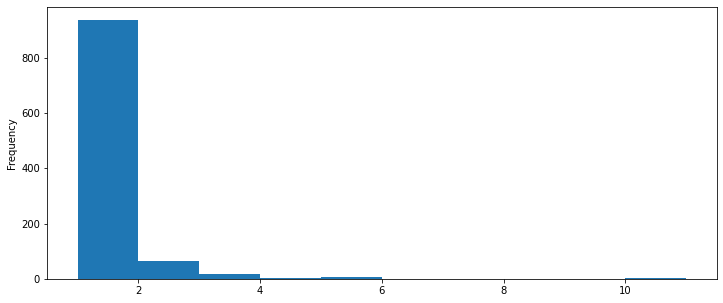

In [ ]:
orders_grouped['transactionId'].plot(kind='hist',
                                     figsize=(12,5),
                                     x = np.arange(orders_grouped['transactionId'].min(),
                                                   orders_grouped['transactionId'].max(),
                                                   1))

Большая часть пользователей в тестовый период делала 1 заказ. При наличии данных за более длительный период можно было бы проанализировать период между повторными заказами разных пользователей и сформулировать гипотезы по его уменьшению, что могло бы стать точкой роста выручки интернет-магазина.

При моделировании A/B-теста на группы делились заказы, а не клиенты интернет-магазина. Из-за этого один и тот же покупатель мог попасть в разные группы. Рассчитаем, какая доля покупателей попала в обе группы.

In [ ]:
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group > 1').count()

group    58
dtype: int64

In [ ]:
(orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group > 1').count()
/ orders.groupby('visitorId').agg({'group' : 'nunique'}).count())

group    0.056256
dtype: float64

Из общего числа покупателей 5,3% покупателей попадают в обе группы. Рассчитаем, какая сумма покупок на них приходится.

In [ ]:
# создадим список покупателей, которые попали в обе группы
double_users = (orders
                .groupby('visitorId')
                .agg({'group' : 'nunique'})
                .reset_index()
                .query('group > 1')['visitorId'].unique())

# отберем и посчитаем сумму их покупок
print(orders.query('visitorId in @double_users')['revenue'].sum())

# рассчитаем процент их покупок
orders.query('visitorId in @double_users')['revenue'].sum()/orders['revenue'].sum()

1558935


0.1560095242832094

Несмотря на то, что в обе группы попадает всего 5% покупателей, на них приходится 15% продаж за период. Удаление такого количества покупок может существенно сказаться на результатах исследования, поэтому удалять их не будем. Кроме того, такое распределение характерно для социальных наблюдений, поэтому для оценки результатов A/B-тестов мы будем применять тест Манна-Уитни, который благодаря ранжированию как раз позволяет оценивать распределения, далекие от нормального.

### Анализ выручки и среднего чека

#### Анализ кумулятивной выручки по группам

При анализе A/B-теста рассматривают данные не за каждый день теста, а накопленный итог и его динамику. Это помогает исклучить проблему подглядывания и увидеть, когда данные стабилизировались, чтобы принять решение об окончании или продолжении A/B-теста.

Сгруппируем данные по дням, заказам и пользователям.

In [ ]:
# создадим таблицу с уникальными датами с указанием групп, чтобы распределить по ним данные о выручке и клиентах
datesGroups = orders[['date', 'group']].drop_duplicates()

# считаем кумулятивную выручку для каждой группы в каждую дату по возрастанию
ordersAggregated = (datesGroups.apply(lambda x:
                                     orders[np.logical_and(orders['date'] <= x['date'],
                                                           orders['group']==x['group'])]
                                     .agg({'date' : 'max',
                                           'group' : 'max',
                                           'transactionId' : 'nunique',
                                           'visitorId' : 'nunique',
                                           'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group']))

# считаем количество посетителей нарастающим итогом
visitorsAggregated = (datesGroups.apply(lambda x:
                                        visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                visitors['group']==x['group'])]
                                        .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1)
                      .sort_values(by=['date','group']))

# объединим данные о сумме заказов и количестве посетителей
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
# переименуем столбцы
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Разобьем датасет с накоплением на подгруппы 'cumulativeData' и построим графики изменения выручки по дням.

Text(0, 0.5, 'Выручка, млн. руб.')

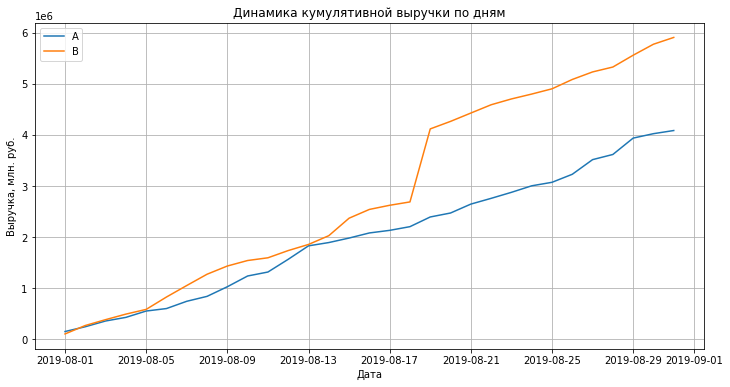

In [ ]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# зададим размер осей
plt.subplots(figsize=(12, 6))

# построим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# построим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# добавим сетку и легенду
plt.grid()
plt.legend()
plt.title('Динамика кумулятивной выручки по дням')
plt.xlabel('Дата')
plt.ylabel('Выручка, млн. руб.')

По графику видно, что в наблюдаемой группе B выручка по дням не сильно превышала кумулятивную выручку в группе A до 18 августа. Но с 19 августа она стала почти в 2 раза больше. С одной стороны это может свидетельствовать, что внедренные изменения сработали и выручка интернет-магазина выросла. Но с другой стороны такой скачкообразный рост за один день может указывать о каком-то большом заказе, который является аномальным. Продолжим дальше проверять данные.

#### Анализ кумулятивного среднего чека по группам

Посмотрим, как менялся средний чек в исходной и наблюдаемой группах.

Text(0, 0.5, 'Средний чек, руб.')

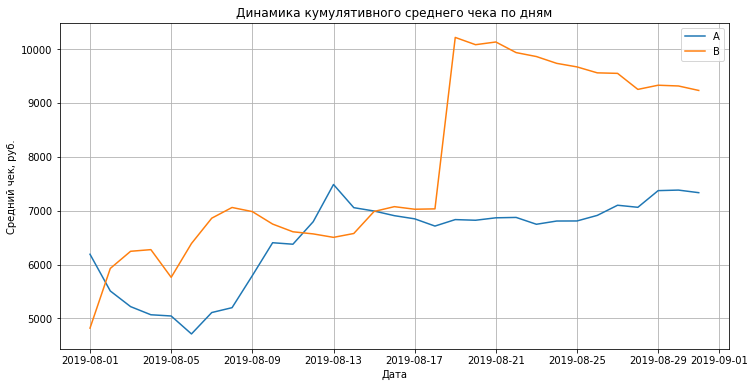

In [ ]:
# зададим оси
plt.subplots(figsize=(12, 6))

# посчитаем средний чек по накопленным данным и построим график
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

# добавим сетку и легенду
plt.grid()
plt.legend()
plt.title('Динамика кумулятивного среднего чека по дням')
plt.xlabel('Дата')
plt.ylabel('Средний чек, руб.')

Как и на графике с кумулятивной выручкой, резкое увеличение среднего чека в группе B произошло 18 августа. Это значит, что выручка в этот день увеличилась сильнее, чем количество клиентов. Предположение о влиянии выброса в сумме заказов выглядит теперь более правдоподобным.

#### Расчет изменения кумулятивного среднего чека

Рассчитаем, насколько изменился средний чек в наблюдаемый период и построим график.

Text(0.5, 0, 'Дата')

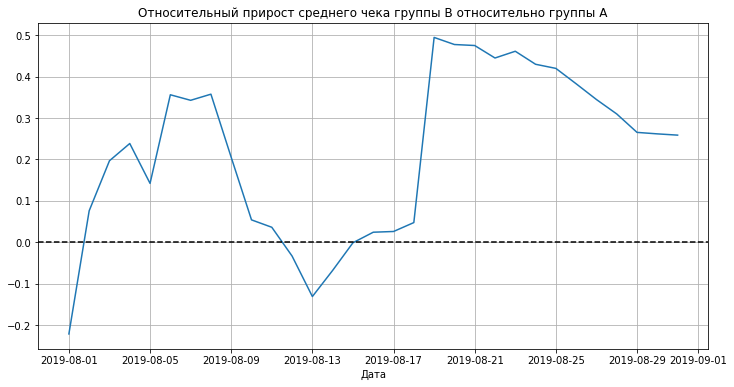

In [ ]:
# объединим данные по группам в одном датафрейме
mergedCumulativeRevenue = (cumulativeRevenueA
                           .merge(cumulativeRevenueB,
                                  left_on='date',
                                  right_on='date',
                                  how='left',
                                  suffixes=['A', 'B']))
# зададим оси
plt.subplots(figsize=(12, 6))

# построим график отношения средних чеков
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X и сетку
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.title('Относительный прирост среднего чека группы B относительно группы A')
plt.xlabel('Дата')

До 18 августа отношение среднего чека в наблюдаемой и исходной группе было нестабильно. Затем произошел скачкообразный рост показатели, но в дальнейшем он снижался. Это говорит о том, что внедренные изменения не позволили добиться стабильного результата для целевой метрики. Однако, и на этот показатель могут влиять выбросы. Поэтому делать окончательные выводы рано.

### Анализ изменения среднего количества заказов

#### Расчет среднего количества заказов по группам

Добавим в таблицу с накопленными данными столбец 'conversion', в котором посчитаем количество заказов на посетителя в наблюдаемой и исходной группах.

In [ ]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Построим графики для изучения динамики.

Text(0, 0.5, 'Выручка, млн. руб.')

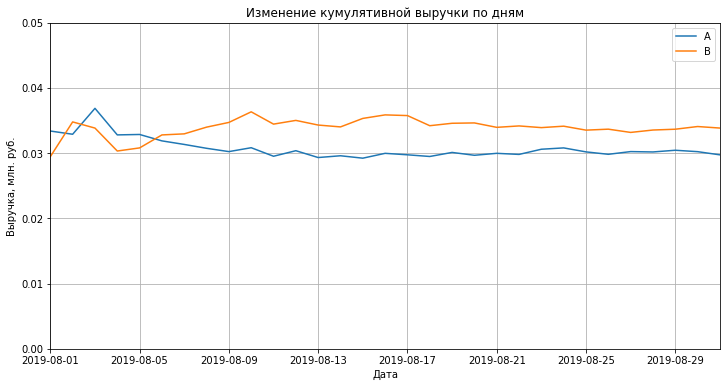

In [ ]:
# задаем оси
plt.subplots(figsize=(12, 6))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей и отображение сетки
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])
plt.grid()
plt.title('Изменение кумулятивной выручки по дням')
plt.xlabel('Дата')
plt.ylabel('Выручка, млн. руб.')

Среднее количество заказов в группе A на короткий отрезок времени превышало среднее количество заказов в группе B, начиная с 6 августа, стало стабильно выше. Количество заказов - опережающая метрика для выручки. И даже ее небольшое увеличение может оказать существенное влияние на доходы интернет-магазина.

#### Расчет относительного изменения среднего количества заказов

Посчитаем относительное изменение кумулятивного среднего количества заказов в группе B по отношению к группе A и построим график.

(18109.0, 18139.0, -0.5, 0.5)

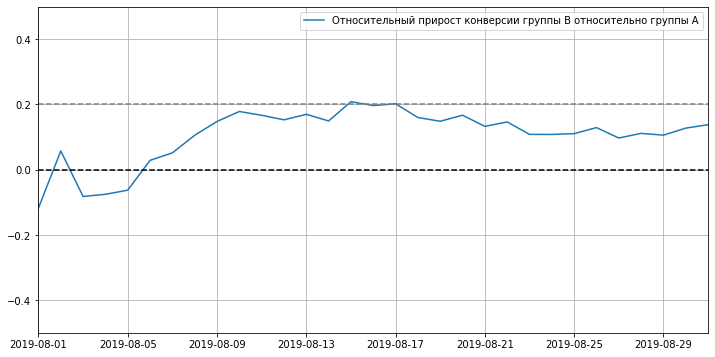

In [ ]:
# объединим таблицы с конверсиями в группах
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']],
                                      left_on='date',
                                      right_on='date',
                                      how='left',
                                      suffixes=['A', 'B']))

# зададим оси
plt.subplots(figsize=(12, 6))

# построим график отношения среднего количества заказов
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label='Относительный прирост конверсии группы B относительно группы A')
plt.grid()
plt.legend()

# добавим вспомогательные линии и масштаб осей
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.5, 0.5])

Также как на графике конверсии, относительная разница среднего количества заказов в группе В по сравнению с группой A околонулевая до 7 августа. Но с 15 по 17 августа она достигла максимально значения в 20% и по итогам месяца сохранилась на уровне около 16%.

### Сравнительный анализ "сырых" и "очищенных" результатов  A/B-теста

#### Анализ количества заказов по пользователям

Еще раз построим график количества заказов по пользователям, но сделаем это в формате scatter-plot.

In [ ]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [ ]:
# сгруппируем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Text(0, 0.5, 'Количество покупок')

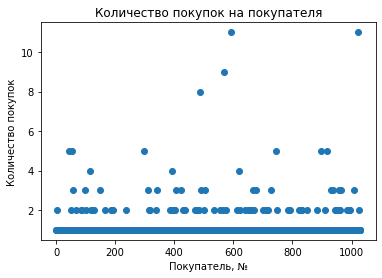

In [ ]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество покупок на покупателя')
plt.xlabel('Покупатель, №')
plt.ylabel('Количество покупок')

Как и гистограмма, точечная диаграмма подтверждает, что большинство пользователей делают 1-2 заказа. Чтобы понять, какая доля пользователей делает большое количество заказов, рассчитаем перцентили распределения количества заказов.

In [ ]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей делали больше 2 заказов, и не более 1% пользователей делали больше 3 заказов. Таким образом, за верхнюю границу нормального числа заказов возьмем 4, а 5 и более заказов будем считать аномальными значениями.

#### Анализ средней стоимости заказов

Также как и для количества заказов, построим точечную диаграмму стоимостей заказов.

In [ ]:
orders.sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


Text(0, 0.5, 'Сумма чеков')

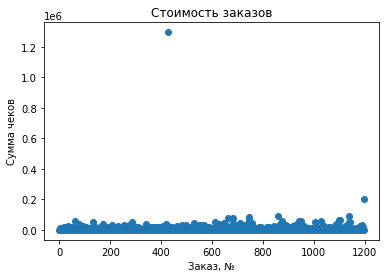

In [ ]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов')
plt.xlabel('Заказ, №')
plt.ylabel('Сумма чеков')

Чтобы определить порог аномальный значений, рассчитаем 95-й и 99-й перцентиль стоимостей заказов.

In [ ]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов совершаются на сумму более 28 тыс. руб., и не более 1% заказов - на сумму более 59 тыс. руб. Примем эту стоимость за порог аномальных значений.

#### Расчет статистической значимости различий

##### Разница в среднем количестве заказов в "сырых" данных

Перед тем, как рассчитать статистическую значимость различий между средним количеством заказов в "сырых" и "очищенных" данных, как и в любом статистическом тесте необходимо сформулировать нулевую и альтернативную гипотезы:
- Нулевая: различий в среднем количестве заказов между группами нет.
- Альтернативная: различия в среднем между группами есть.

Уровень статзначимости, по которой будем отвергать нулевую гипотезу, примем в размере 5%.

Подготовим данные.

In [ ]:
# отберем количество посетителей по дням для группы A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# посчитаем количество посетителей по дням нарастающим итогом
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# сделаем то же самое для группы B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# посчитаем выручку по дням нарастающим итогом для группы A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# посчитаем выручку по дням нарастающим итогом для группы B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

# объединим по датам количество заказов и выручку для обеих групп
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935
6,2019-08-07,18,142417,24,225334,145,740818,153,1049671,644,709,4629,4644
7,2019-08-08,16,96279,27,220918,161,837097,180,1270589,610,654,5239,5298
8,2019-08-09,16,188506,25,160812,177,1025603,205,1431401,617,610,5856,5908
9,2019-08-10,16,210495,23,107802,193,1236098,228,1539203,406,369,6262,6277


In [ ]:
# отберем заказы по группам A и B и сгруппируем их по идентификатору посетителя
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

# объединим пользователей, у которых есть заказы, с пользователями без заказов
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0,
                               index=np.arange(data['visitorsPerDateA'].sum()
                                                  - len(ordersByUsersA['orders'])),
                               name='orders')],
                    axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0,
                               index=np.arange(data['visitorsPerDateB'].sum()
                                               - len(ordersByUsersB['orders'])),
                               name='orders')],
                    axis=0)

# рассчитаем статистическую значимость различий в распределениях количества заказов в группах
# с помощью теста Манна-Уитни
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# рассчитаем разницу в среднем количестве заказов в группах
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.01679
0.138


p-value проведенного теста равен 0.01, что меньше 0.05. Это значит, что нулевая гипотеза о том, что разницы в среднем количестве заказов между наблюдаемой и исходной группами нет, не подтверждается, и разница между средним количеством заказов есть, и она составляет 13.8%.

##### Разница в среднем чеке в "сырых" данных

Сформулируем нулевую и альтернативную гипотезы для статтеста:
- Нулевая: различий в среднем чеке между группами нет.
- Альтернативная: различия в среднем чеке между группами есть.

Уровень статзначимости, по которой будем отвергать нулевую гипотезу, примем в размере 5%.

In [ ]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                          orders[orders['group']=='B']['revenue'])
                       [1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                       orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


Проведенный тест показывает, что в "сырых" данных вероятность того, в группах A и B средняя стоимость заказа может быть равна, составляет 0.729, что превышает принятый уровень статзначимости. Поэтому мы не может отвергнуть нулевую гипотезу, и разница в среднем чеке в размере 25.9% не является статистически значимой, разницы в группах нет.

##### Разница в среднем количестве заказов в "очищенных" данных

Мы уже рассчитали 95-й и 99-й перцентили количества и стоимости заказов, они составляют 2 и 4 заказа и 28 тыс. и 52.3 тыс. руб. соответственно. В качестве аномальных возьмем количество заказов больше 3, стоимость заказов больше 28 тыс. руб. и исключим пользователей, которые их совершили.

In [ ]:
# сохраним границы на уровне 95-го перцентиля и назовем для отбора в переменных
manyOrders = np.percentile(ordersByUsers['orders'], 95)
print(manyOrders)
expensiveOrders = np.percentile(orders['revenue'], 95)
print(expensiveOrders)

# из ранее подготовленных таблиц с количеством заказов отберем покупателей с количеством заказов больше 2
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > manyOrders]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > manyOrders]['userId'],
    ],
    axis=0)

# и с размером заказа больше 28 тыс. руб.
usersWithExpensiveOrders = orders[orders['revenue'] > expensiveOrders]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head()

2.0
28000.000000000004


1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64

In [ ]:
# конкатенируем построчно покупателей с заказами и обычных посетителей для группы A
# исключив из них аномальных покупателей
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# также для группы B
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

# проведем тест Манна-Уитни
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01304
0.173


За предельный уровень статзначимости так же, как и раньше, примем 5%. P-value проведенного теста составил 1.794%, это ниже 5%, поэтому нулевая гипотеза не подтверилась и разница в среднем количестве заказов между группами есть. Она составляет 14.8%.

##### Разница в среднем чеке в "очищенных" данных

Проведем тест для проверки разницы средней стоимости заказа в группах без аномальных пользователей. Критический p-value примем на уровне 0.05.

In [ ]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


P-value проведенного теста составил 0.977, что значительно превышает критический уровень статзначимости. Поэтому как и в случае с "сырыми" данными разница в среднем чеке в группах A и B не существенна. Средний чек в группе B ниже среднего чека в группе A на 1,7%.

### Выводы

В данном исследовании мы проанализировали среднее количество заказов и средний чек, изучили их динамику и провели статистические тесты для выявления различий в целевой и исходной группах и принятия решения о внедрении изменений для увеличения выручки интернет-магазина.

По результатам статтестов мы выявили:
1. Разница в количестве заказов является статистически значимой и по "сырым", и по "очищенным" данным.
2. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.

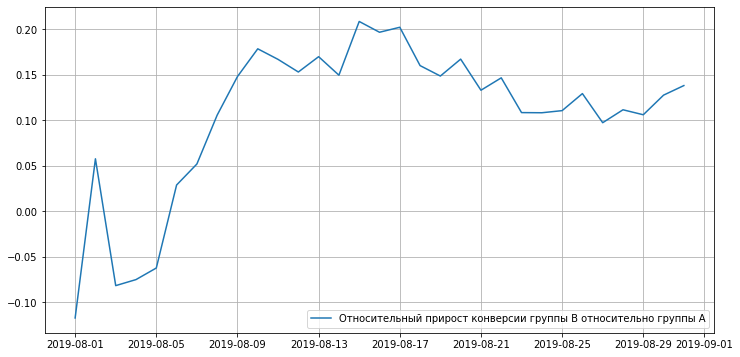

In [ ]:
plt.subplots(figsize=(12, 6))
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост конверсии группы B относительно группы A")
plt.grid()
plt.legend()

Таким образом, выявленная тенденция к стабилизации прироста количества заказов в группе B относительно группы A подтверждает, что группа B лучше группы A. Вариабельность графика прироста указывает на то, что тест можно продлить на 7-14 дней до окончательной стабилизации, и если данные подтвердятся, эксперимент можно считать успешным.

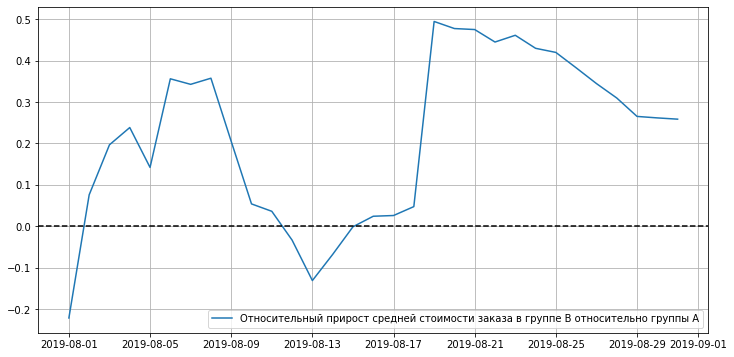

In [ ]:
plt.subplots(figsize=(12, 6))

plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1,
         label="Относительный прирост средней стоимости заказа в группе B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.grid()

В ситуации со средним чеком ситуация не такая радужная. Несмотря на то, что во второй половине периода проведения A/B-теста, прирост среднего чека в наблюдаемой группе стал положительным и к концу теста составил 25%, статзначимость этих изменений не существенна. По показателю среднего чека надо признать эксперимент несостоявшимся и прекратить его.

Таким образом, для увеличения выручки интернет-магазина проведенный эксперимент можно считать успешным, так как влияя на количество заказов, даже без увеличения среднего чека, можно увеличить выручку.